In [23]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# get sample data from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

print("keys:",boston.keys())
print("shape:",boston.data.shape)
print("feature names:",boston.feature_names)
print("Description:",boston.DESCR)

keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
shape: (506, 13)
feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Description: .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        

In [25]:
# converting to data frames
bos = pd.DataFrame(boston.data) # create the data frame
bos.columns = boston.feature_names # label columns
bos['PRICE'] = boston.target # Create price column
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


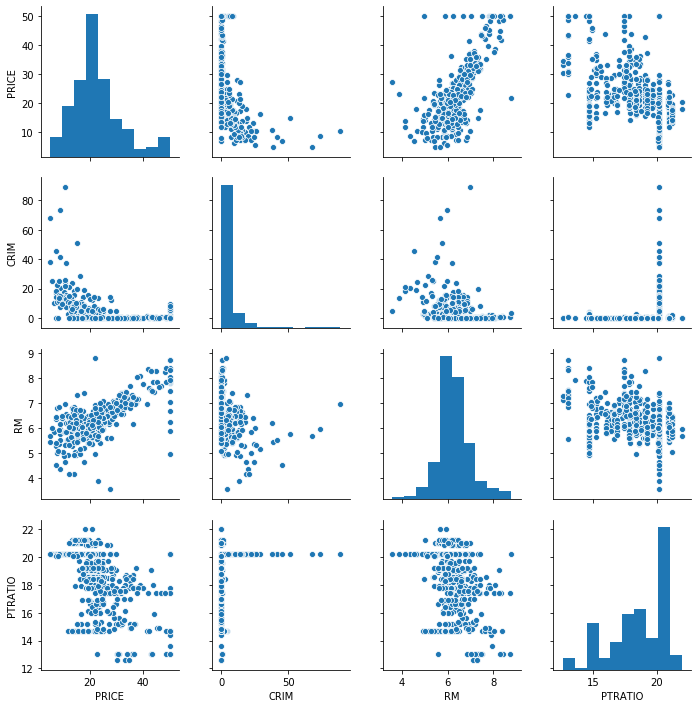

In [26]:
# looking at a few relationships
sns.pairplot(bos[['PRICE', 'CRIM', 'RM', 'PTRATIO']])

In [43]:
# defining matrices
Y = np.array(bos.PRICE)

# adding cloumn of ones to X for intercept
X = np.vstack([np.ones_like(Y), np.array(bos.CRIM), np.array(bos.RM), np.array(bos.PTRATIO)])

In [44]:
print(X.shape)

(4, 506)


In [45]:
A = np.linalg.inv(np.dot(X,X.T)) # Note that in the above X is really X'

In [46]:
B = np.dot(X,Y)

In [47]:
C = np.dot(A,B)

In [50]:
# final coefficient estimates
print(C)

[-3.37070434 -0.20496083  7.3804111  -1.0695461 ]


### Verify Regression estimates using numpy: np.linalg.lstsq

In [49]:
np.linalg.lstsq(X.T,Y.T,rcond = -1)

(array([-3.37070434, -0.20496083,  7.3804111 , -1.0695461 ]),
 array([17328.23712008]),
 4,
 array([451.52855439, 186.97603087,  24.18045408,   1.45116825]))

In [11]:
np.linalg.lstsq?